# Data Visualization – Assignment 2 (Part 2/2)



In this part we will further explore the avalan data by creating custom charts in Matplotlib. 

**Note that you may only use Matplotlib for this homework; no other charting libraries like Seaborn!**

## Your Info and Submission Instructions

* *First name:* Mehmood
* *Last name:* Munir
* *Roll No:* 25I-7804



For your submission, please do the following things: 
* **rename the file to `hw2_Part2_Roll_No.pynb`**
* **include all files that you need to run the homework, including the data file provided** 
* **don't use absolute paths, but use a relative path to the same directory for referencing data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime



plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline
# This renders your figures as vector graphics AND gives you an option to download a PDF too
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

## Read & Clean up the Data

You've already done data cleanup in the previous homework, Do the same here. 

In [2]:
# your code here
df= pd.read_csv("avalan.csv")


# Convert Date Column to datetime
df["Date"] = pd.to_datetime(df['Date'], format="%m/%d/%Y", errors='coerce')

# Create a New Column Year
df["Year"] = df["Date"].apply(lambda x: x.year )
df["Year"] = pd.to_numeric(df['Year'], errors='coerce')
df["Year"] = pd.to_numeric(df["Year"]).astype('Int64')


# Create a New Column Month
df["Month"] = df["Date"].apply(lambda x: x.month )
df["Month"] = pd.to_numeric(df['Month'], errors='coerce')
df["Month"] = pd.to_numeric(df["Month"]).astype('Int64')

df["Elevation_Feet"] = df["Elevation"].apply(lambda x: int(x[:-1].replace(',', '')) if type(x) == str else x)
df["Depth_Inches"] = df["Depth"].apply(lambda x: float(x[:-1].replace(',', '')) if type(x) == str else x)
df["Width_Inches"] = df["Width"].apply(lambda x: float(x[:-1].replace(',', '')) if type(x) == str else x)
df["Vertical_Inches"] = df["Vertical"].apply(lambda x: float(x[:-1].replace(',', '')) if type(x) == str else x)
df = df.dropna(subset=['Elevation_Feet', "Region", "Aspect", "Year", "Month", "Date"])
df

,Date,Region,Place,Trigger,Trigger: additional info,Weak Layer,Depth,Width,Vertical,Aspect,...,Comments 1,Comments 2,Comments 3,Comments 4,Year,Month,Elevation_Feet,Depth_Inches,Width_Inches,Vertical_Inches
0,2012-11-09,Salt Lake,Sunset Peak,Snowboarder,Unintentionally Triggered,New Snow/Old Snow Interface,"14""",80',30',North,...,While it was a small avalanche that was I caug...,NaN,NaN,NaN,2012,11,10400.0,14.0,80.0,30.0
1,2012-11-10,Salt Lake,Pioneer Ridge,Skier,Remotely Triggered,Facets,2',20',125',North,...,Directly above cat track leading to lift. Cat...,NaN,NaN,NaN,2012,11,9900.0,2.0,20.0,125.0
2,2012-11-10,Salt Lake,Pioneer Bowl,Natural,NaN,Facets,NaN,NaN,NaN,North,...,"Looked and felt like winter today, nice to be ...",NaN,NaN,NaN,2012,11,9700.0,NaN,NaN,NaN
3,2012-11-11,Salt Lake,Patsy Marly,Skier,Unintentionally Triggered,New Snow/Old Snow Interface,2.5',100',100',North,...,A North facing aspect with an exposed ridge in...,NaN,NaN,NaN,2012,11,9700.0,2.5,100.0,100.0
4,2012-11-11,Salt Lake,Two Dogs,Skier,Remotely Triggered,Facets,3',70',450',North,...,Remotely triggered all the new storm snow (abo...,NaN,NaN,Additional comments by another backcountry obs...,2012,11,10200.0,3.0,70.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,2023-05-09,Salt Lake,Stairs Gulch,Natural,NaN,NaN,10',NaN,NaN,Northwest,...,\r\n\r\nI will start off by saying this has ta...,NaN,NaN,NaN,2023,5,9600.0,10.0,NaN,NaN
7559,2023-05-21,Salt Lake,Red Pine Gulch,Skier,NaN,NaN,"4""",20',NaN,Northeast,...,Wet loose slide triggered by skier. Carried sk...,NaN,NaN,NaN,2023,5,10700.0,4.0,20.0,NaN
7560,2023-05-20,Salt Lake,Salt Lake,Natural,NaN,NaN,"2""",25',NaN,Southeast,...,Transitioning from my skins to start boot pack...,NaN,NaN,NaN,2023,5,10700.0,2.0,25.0,NaN
7561,2023-06-06,Provo,Provo,Skier,NaN,NaN,NaN,15',NaN,Northwest,...,I was skiing down the Couloir and decided to m...,NaN,NaN,NaN,2023,6,10900.0,NaN,15.0,NaN


# Part 1: Violin Plot Per Region

* Create a horizontal violin plot of distributions of avalan elevations by Region.  
* Sort the regions by the median avalan elevation in a descending order. 
* Plot the mean on the violing plot. 
* Create lables for the regions that also show the number of avalan in the region. For example: "Salt Lake (3654)"
* Analyze the data. What are trends you see? 

Hints: 
* you'll need to create a series of elevation values for each region 
* Matplotlib violinplots don't like NAN values, make sure to drop them before you try to plot

You can choose your own aesthetics, but make sure it looks good. 

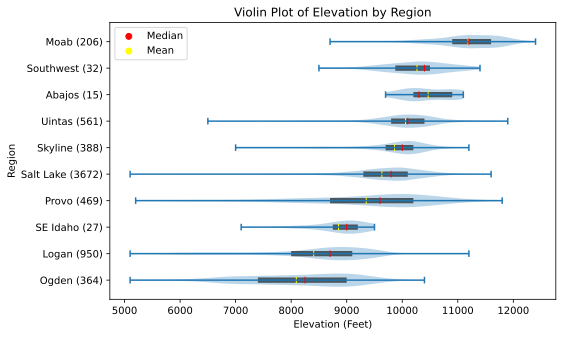

In [3]:
# your code here

np.random.seed(42)

# Compute median and count for each category
category_stats = df.groupby('Region')['Elevation_Feet'].agg(['median', 'count']).sort_values('median')
sorted_categories = category_stats.index.tolist()
sorted_category_data = [df.loc[df['Region'] == cat, 'Elevation_Feet'].values for cat in sorted_categories]

# Create labels with category name + count as mentioned in the task
category_labels = [f"{cat} ({category_stats.loc[cat, 'count']})" for cat in sorted_categories]

# Create Violin Plot horizontally
fig, ax = plt.subplots(figsize=(8, 5))
violin_parts = ax.violinplot(sorted_category_data, vert=False, showmeans=True, showmedians=True)

# Change Mean Line Color
violin_parts['cmeans'].set_color('yellow')  # Mean in White
violin_parts['cmeans'].set_linewidth(1)

# Change Median Line Color
violin_parts['cmedians'].set_color('red')  # Median in Red
violin_parts['cmedians'].set_linewidth(1)

# Overlay IQR Box for each category
for i, values in enumerate(sorted_category_data):
    q1 = np.percentile(values, 25)  
    q3 = np.percentile(values, 75)  
    iqr = q3 - q1  
    median = np.median(values)  
    ax.barh(i + 1, width=iqr, left=q1, height=0.2, color='black', alpha=0.6)  
    


# Customize Y-axis with category labels
ax.set_yticks(range(1, len(sorted_categories) + 1))
ax.set_yticklabels(category_labels)

# Labels and Title
ax.set_xlabel('Elevation (Feet)')
ax.set_ylabel('Region')
ax.set_title('Violin Plot of Elevation by Region')

plt.scatter([], [], color='red', label='Median')
plt.scatter([], [], color='yellow', label='Mean')
plt.legend(loc='upper left')


plt.show()

### Your Analysis: 
- Moab have less avalanes but average avalanes elevation is almost 11000. Median and Mean both are close.  Moab Region have the Avalanes which have the highest Elevation i.e close to 12000.
- Salt Lake Region have the highest number of avalanes. All the avalanes have the average elevation i.e close to 10000.

# Part 2: Radial Bar Chart

* Create a radial bar chart of the average number of avalanes in a year by Aspect.
* Arrange the aspects in the usual convention (North at the top, West on the left, etc.).
* Color the barchart using a cyclic colormap (e.g., HSV).
* Provide an analysis.

Hints: 
* Here is some useful reading: [https://matplotlib.org/stable/api/projections/polar.html](https://matplotlib.org/stable/api/projections/polar.html)

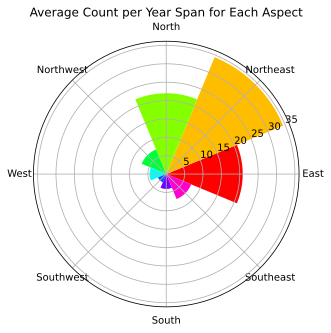

In [4]:
import numpy as np
import matplotlib.pyplot as plt


order = {
    'East': 0,
    'Northeast': 45,
    'North': 90,
    'Northwest': 135,
    'West': 180,
    'Southwest': 225,
    'South': 270,
    'Southeast': 315
}

# Group by 'Aspect' and compute the count, min, and max of the Year
grouped = df.groupby('Aspect')['Year']
stats = grouped.agg(count='count', min_year='min', max_year='max')


# Calculate the year span for each aspect
stats['year_span'] = stats['max_year'] - stats['min_year']


# Dividing the year span by max because to compare the avalanes in a one common time span i.e from 1958 to 2023.
stats['year_span'] = stats['year_span'].max()


# Compute the average count per year span
stats['avg_count'] = stats['count'] / stats['year_span']

# Sort the DataFrame using the custom order on the index
stats = stats.sort_index(key=lambda idx: idx.map(order))
sorted_categories = stats.index.tolist()
avg_counts = stats['avg_count'].values


# Determine the number of bars
N = len(stats)


# Calculate angles and bar width for a full circle (in radians)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = 2 * np.pi / N


# Create a polar subplot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
colors = plt.cm.hsv(theta/2/np.pi)

# Plot bars using the average count values
bars = ax.bar(theta, avg_counts, width=width, bottom=0.0, color= colors)


# Set the category labels at the corresponding angles
ax.set_xticks(theta)
ax.set_xticklabels(sorted_categories)


plt.title('Average Count per Year Span for Each Aspect')
plt.show()


### Your Analysis: 
- Most of the Avalanes occur in span of 65 years (1958 to 2023) is From East to North.
- Southwest have minimum number of avalanes.
- Northeast have the maximum number of avalanes.

# Part 3: Rolling average area subplots

* Create a chart where each subfigure is an area chart of the 7-day rolling average of the number of avalanes in a given ski season. Assume that a "ski season" starts July 1 and ends June 31.
* The subplots should overlap so that outliers are less of a problem.
* Provide an analysis of the data. 

Useful methods to consider: 
- Pandas's `.rolling()`
- matplotlib's `.fill_between()`, `.set_axis_off()`, `.tight_layout()`
- datetime's `.timetuple().tm_yday`

Make sure to check out the arguments of the above methods.


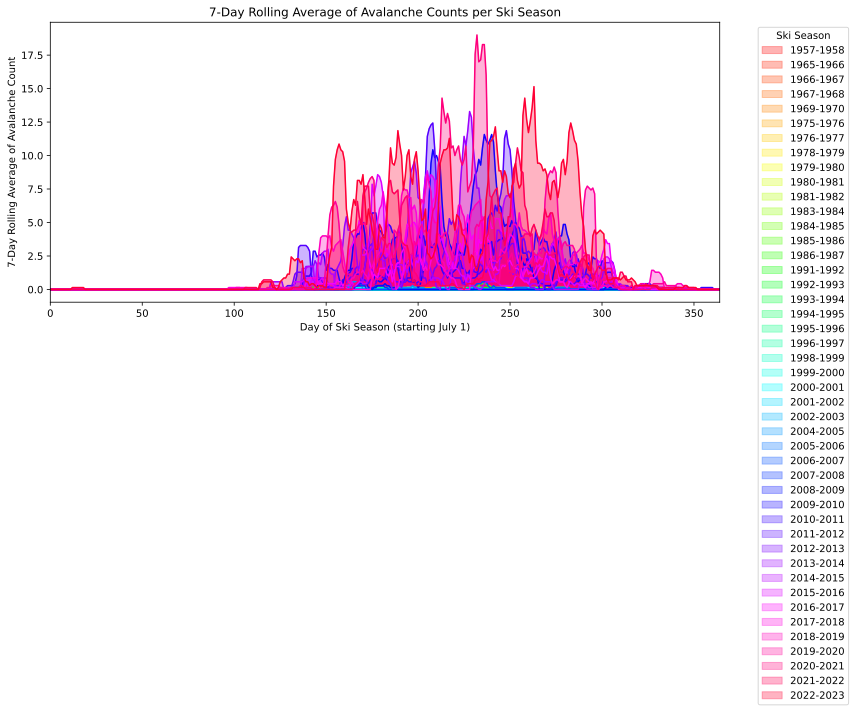

In [10]:



# Define a function to assign a ski season.
# For dates in July or later, the season is current_year-current_year+1.
# For dates earlier than July, the season is previous_year-current_year.
def get_ski_season(date):
    if date.month >= 7:
        return f"{date.year}-{date.year+1}"
    else:
        return f"{date.year-1}-{date.year}"

df['Ski_Season'] = df['Date'].apply(get_ski_season)

# Define a function to compute the day-of-season.
# Each season starts on July 1 (day 0) and runs through June 30 (day 364).
def get_day_of_season(date):
    if date.month >= 7:
        season_start = pd.Timestamp(year=date.year, month=7, day=1)
    else:
        season_start = pd.Timestamp(year=date.year-1, month=7, day=1)
    return (date - season_start).days

df['Day_of_Season'] = df['Date'].apply(get_day_of_season)

# For each ski season, compute daily avalanche counts.
# We assume each row in df corresponds to one avalanche event.
seasons = {}
for season, group in df.groupby('Ski_Season'):
    # Count avalanches per day of the season
    daily_counts = group.groupby('Day_of_Season').size()
    # Reindex so that every day from 0 to 364 is represented (fill missing days with 0)
    daily_counts = daily_counts.reindex(range(365), fill_value=0)
    # Compute the 7-day rolling average (using min_periods=1 so early days are calculated)
    rolling_avg = daily_counts.rolling(window=7, min_periods=1).mean()
    seasons[season] = rolling_avg

# --- Plot overlapping area charts for each ski season ---
plt.figure(figsize=(12, 8))
cmap = plt.cm.hsv  # Use the HSV colormap
n_seasons = len(seasons)
season_names = sorted(seasons.keys())

for i, season in enumerate(season_names):
    series = seasons[season]
    x = series.index  # Day of season: 0 to 364
    color = cmap(i / n_seasons)  # Normalize color across seasons
    plt.fill_between(x, series, color=color, alpha=0.3, label=season)
    plt.plot(x, series, color=color)

plt.xlabel("Day of Ski Season (starting July 1)")
plt.ylabel("7-Day Rolling Average of Avalanche Count")
plt.title("7-Day Rolling Average of Avalanche Counts per Ski Season")
plt.xlim(0, 364)
plt.legend(title="Ski Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Your Analysis: 
- Most of the avalanes occurs from 110th day of the ski season to 310 that means from End of October to April Month.
- First 100 days and last 50 days of the ski season there is very less avalanes.